<a href="https://colab.research.google.com/github/newman001/my_learning_progress/blob/master/pytorch_train_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']

[6.0, 4.0]

In [0]:
import torch

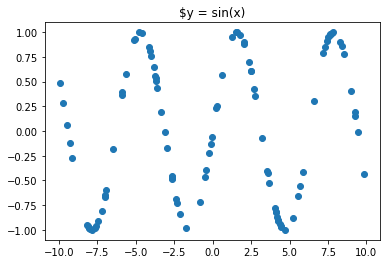

In [3]:
x_train = torch.rand(100)
x_train = x_train*20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)');

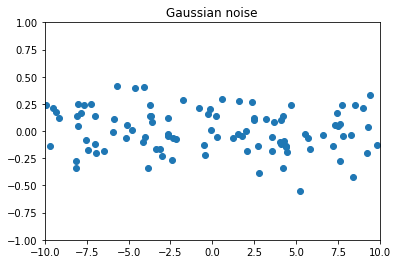

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

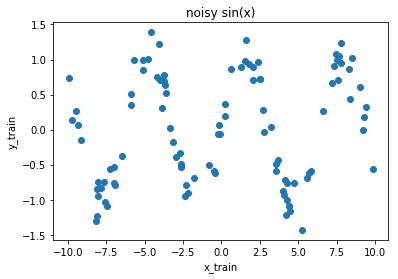

In [5]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [7]:
tmp = torch.Tensor([1, 2, 3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


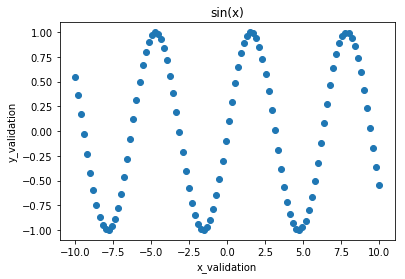

In [8]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [0]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
  

sine_net = SineNet(3)

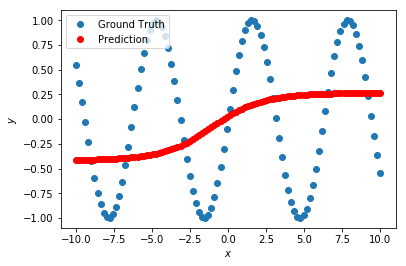

In [19]:
def predict(net, x, y):
  y_pred = net.forward(x)
  
  plt.plot(x.numpy(), y.numpy(), 'o', label='Ground Truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o',
           c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  
  
predict(sine_net, x_validation, y_validation)